# Face identification solution
This a solution for face ID task with ATT faces dataset https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

all faces are available here https://www.cl.cam.ac.uk/research/dtg/attarchive/images/pictures/faces.gif

Install OpenCV with the following command (considering the other packages have been already installed before): 
* pip install opencv-contrib-python

Then download the faces pictures archive and put them to '/faces' folder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import h5py
# import scipy
# from PIL import Image
# from scipy import ndimage
# from lr_utils import load_dataset
import cv2, os

%matplotlib inline

In [2]:
# TODO: remove hard-coded path later
parent_folder = 'C:/Programs/ISD--ML/ml_course/face_ID/faces/s'
images = []
Y=[]

for i in range(1, 41):
    path = parent_folder + str(i)
    for file in os.listdir(path):
        filepath = path + '/' + file
        img = cv2.imread(filepath, -1)
        images.append(img)
        Y.append(i)
len(images)

400

217

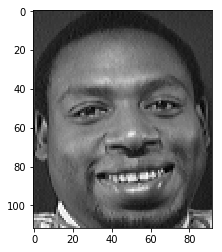

In [3]:
# check that images was read correctly: 
# it should be one person's face between indexes (0-9), (10-19),...,(390-399)
index = np.random.randint(400)

plt.imshow(images[index], cmap='gray')
index

In [4]:
"""let's make an answers set of photo to manually check our pics for id
    on every picture let's put an id-number
"""
answers = images[:]

for i in range(len(answers)):
    cv2.putText(answers[i], 'id:{}'.format(str(i//10 + 1)), (47, 107), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 240), 2)    

Picture number:  182


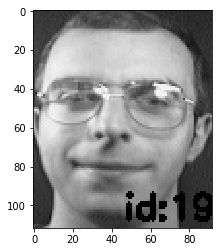

In [5]:
index = np.random.randint(400)
plt.imshow(answers[index], cmap='gray') 
print('Picture number: ', index)

# some utility functions
Let's code some utility functions 

In [6]:
def sigmoid(z):
    """utility function for sigmoid"""
    s = 1 / (1 + np.exp(-x))
    return s

In [7]:
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height)    
    Returns:
    v -- a vector of shape (length*height, 1)
    """
    v = image.reshape((image.shape[0]*image.shape[1]), 1)
    return v

In [8]:
def normalize(matrix):
    return matrix / np.max(matrix)

In [14]:
def mse(A, B):
    """returns  mean square (i.e., Euclidean distance) between two matrixes """
    mse = (np.square(A - B)).mean(axis=ax)
    return mse

In [15]:
def propagate(w, b, X, Y):
    """
    utility function from Linear Regression task
    Implement the cost function and its gradient for the propagation 

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """    
    m = X.shape[1]       
    A = sigmoid(np.dot(w.T, X) + b) 
    cost = mse(A, Y)              
    dw = np.dot(X,(A-Y).T) / m
    db = np.sum(A-Y) / m   
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [16]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px , 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):        
        grads, cost = propagate(w, b, X, Y)        
        dw = grads["dw"]
        db = grads["db"]        
        w = w - learning_rate * dw
        b = b - learning_rate * db
   
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [22]:
def split_data(dataset, train_percentage=80):
    # TODO: implement the function
    """this function splits the datasets with given percentage
        and returns two separate sets - for train(80%) and test(20%) data
        
        train_percentage - how much % from dataset would be splited for train dataset.
        so (100-train_percentage)% would be splitted for testing
    
    """
    data_splitted = Y_splitted = None
    return data_splitted, Y_splitted

In [18]:
def train(dataset, target):
    #     TODO: implement the function
    """ this function should train dataset 
        returns vector of Weights
    
    """
    pass

In [19]:
def read_data():
    """this function reads the data from entire file and returns the
        dataset in such format:
        dataset = [ [ image2vector(1) ],
                    [ image2vector(2) ],
                    ...
                    [ image2vector(400) ]
        
        image2vector(*) - is an image represented in (width*height) form vector
    """
    # TODO: remove hard-coded path later
    parent_folder = 'C:/Programs/ISD--ML/ml_course/face_ID/faces/s'
    images = []
    Y = []
    for i in range(1, 41):
        path = parent_folder + str(i)
        for file in os.listdir(path):
            filepath = path + '/' + file
            
            img = cv2.imread(filepath, -1)
            images.append(img)
            Y.append(i)
            
    rows = len(images)
    """ we know, all pictures are the same size, so
        it doesn't matter which of them to use, i.e. 3
    """
    cols = images[3].shape[0] * images[3].shape[1]    

    dataset = np.array([image2vector(img) for img in images])
    dataset = dataset.reshape(rows,cols)
    
    return dataset

In [20]:
dataset = read_data()
dataset = normalize(dataset)

In [21]:
dataset.shape

(400, 10304)